In [16]:
### This cell has placeholder data, if for some reason data cannot be read from the csv file
import pandas as pd

data = {
    'date': ['2024-08-27', '2024-08-28', '2024-08-29'],
    'MMM': [0.6, 0.7, 0.5],
    'GOOGL': [0.6, 0.8, 0.9],
    'ALL': [0.3, 0.2, 0.7],
}


# Create the DataFrame
df = pd.DataFrame(data)

In [1]:
### This cell imports the aggregated percent_return.csv data as a Pandas dataframe
import pandas as pd

df = pd.read_csv('percent_return.csv')
# Set 'date' as the index
df.set_index('date', inplace=True)

print("Original Data:")
print(df)

Original Data:
                   A       AAL      AAPL      ABBV      ABNB       ABT  \
date                                                                     
2024-06-03  0.889681 -0.603454  0.469502 -0.792589  0.349934  0.153790   
2024-06-04 -0.481854 -0.346620 -0.264434  0.295955  0.864075  0.081875   
2024-06-05  2.123945  0.955688  0.124639  0.634790 -1.486685 -0.237806   
2024-06-06  0.086028 -1.295334 -0.733231  0.933931  1.023988  0.416045   
2024-06-07  0.593907  1.232397  1.033843 -0.664010  0.314642  3.035119   
...              ...       ...       ...       ...       ...       ...   
2024-08-26 -0.439370 -2.109303  0.185217 -0.060739 -0.975609 -0.035481   
2024-08-27  0.441351 -0.877194  0.898230 -1.045511  1.248911  0.035380   
2024-08-28 -0.332086 -0.196661 -0.627410 -0.061380  1.318964 -0.176832   
2024-08-29  0.323778  1.464849 -0.134730 -0.418371 -1.328594 -0.476612   
2024-08-30  0.534605  1.239277 -0.516965  0.542892  0.316397  0.238935   

                ACGL  

In [2]:
### This cell creates the absolute correlation matrix for the company daily return data.

# Compute the correlation matrix
abs_corr_matrix = df.corr().abs()

print("\nAbsolute Correlation Matrix:")
print(abs_corr_matrix.head())

# Convert correlation to dissimilarity
dissimilarity_matrix = 1 - abs_corr_matrix

print("\nDissimilarity Matrix:")
print(dissimilarity_matrix.head())



Absolute Correlation Matrix:
             A       AAL      AAPL      ABBV      ABNB       ABT      ACGL  \
A     1.000000  0.403697  0.164801  0.268871  0.081532  0.180359  0.016299   
AAL   0.403697  1.000000  0.100895  0.296559  0.335167  0.164947  0.106232   
AAPL  0.164801  0.100895  1.000000  0.356907  0.248594  0.272208  0.266209   
ABBV  0.268871  0.296559  0.356907  1.000000  0.174355  0.403965  0.201817   
ABNB  0.081532  0.335167  0.248594  0.174355  1.000000  0.113559  0.066657   

           ACN      ADBE       ADI  ...       WTW        WY      WYNN  \
A     0.277175  0.191878  0.369517  ...  0.092856  0.297288  0.231846   
AAL   0.292661  0.219390  0.383376  ...  0.151891  0.351651  0.469353   
AAPL  0.070071  0.216239  0.113080  ...  0.306025  0.199898  0.047702   
ABBV  0.146177  0.110544  0.080362  ...  0.476894  0.411671  0.031420   
ABNB  0.234922  0.300140  0.381594  ...  0.177728  0.077026  0.256550   

           XEL       XOM       XYL       YUM       ZBH      ZB

Text(0.5, 1.0, 'Absolute Correlation Heatmap for Stock Daily Return')

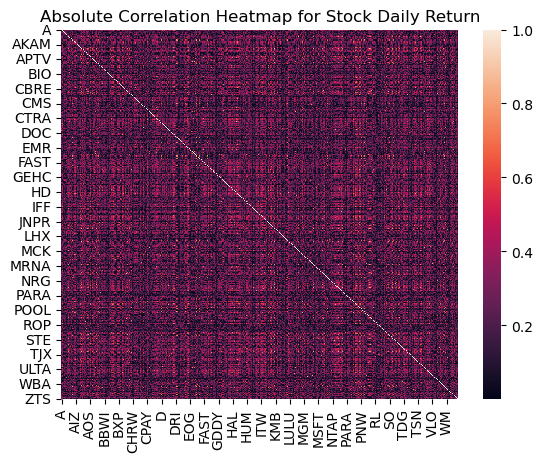

In [3]:
### This cell creates a heatmap for the absolute correlation matrix

import seaborn as sns

sns.heatmap(abs_corr_matrix).set_title("Absolute Correlation Heatmap for Stock Daily Return")


Text(0.5, 1.0, 'Dissimilarity Heatmap for Stock Daily Return')

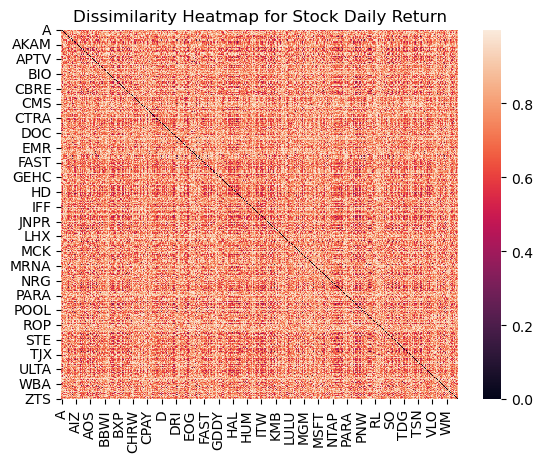

In [4]:
### This cell creates a heatmap for the dissimilarity matrix

sns.heatmap(dissimilarity_matrix).set_title("Dissimilarity Heatmap for Stock Daily Return")

Text(0.5, 1.0, 'Absolute Correlation Heatmap for Tech and Healthcare Companies')

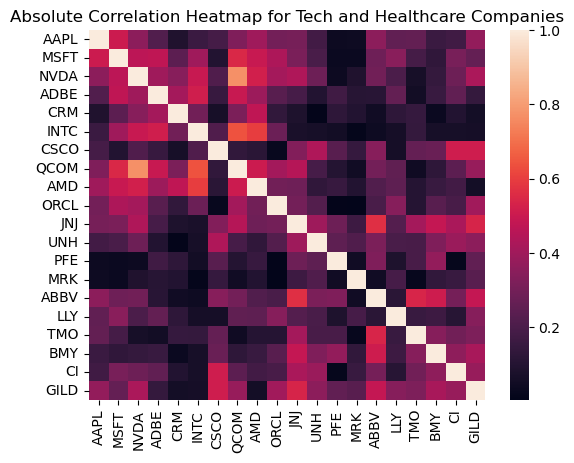

In [5]:
# Companies from Technology and Healthcare sectors
tech_companies = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'CRM', 'INTC', 'CSCO', 'QCOM', 'AMD', 'ORCL']
healthcare_companies = ['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'LLY', 'TMO', 'BMY', 'CI', 'GILD']

selected_companies = tech_companies + healthcare_companies

abs_corr_matrix = (df[selected_companies].corr()).abs()

# Plot heatmap for 20 selected companies
sns.heatmap(abs_corr_matrix).set_title("Absolute Correlation Heatmap for Tech and Healthcare Companies")

Text(0.5, 1.0, 'Dissimilarity Heatmap for Tech and Healthcare Companies')

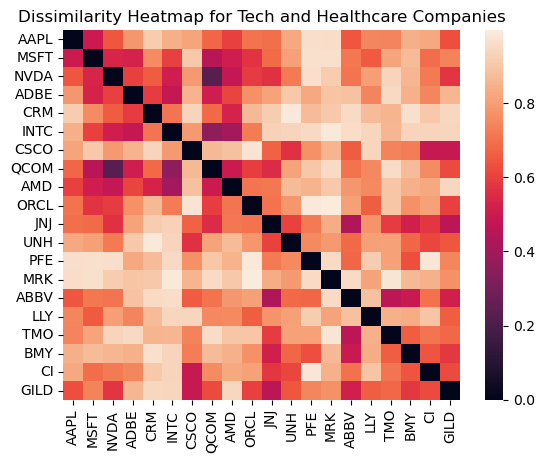

In [6]:
# Plot dissimilarity heatmap for 20 selected companies
sns.heatmap(1 - abs_corr_matrix).set_title("Dissimilarity Heatmap for Tech and Healthcare Companies")

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Calculate linkage using dissimilarity matrix

dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')

/var/folders/r_/3pfy0czn0g74pcjhthq4zy2r0000gn/T/ipykernel_25324/1719917102.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dissimilarity_linkage_data = linkage(dissimilarity_matrix, method='complete')


In [8]:
# Turn data into a set of points
data = list(zip(df.values.flatten()))

# Select the 10 selected tech companies

tech_data = df[['AAPL', 'MSFT', 'NVDA', 'ADBE', 'CRM', 'INTC', 'CSCO', 'QCOM', 'AMD', 'ORCL']]

# Compute linkage for top 10 tech companies

tech_dissimilarity = linkage(tech_data, method = 'complete')

# Get the 10 selected healthcare companies from DataFrame

healthcare_data = df[['JNJ', 'UNH', 'PFE', 'MRK', 'ABBV', 'LLY', 'TMO', 'BMY', 'CI', 'GILD']]

# Compute linkage for top 10 healthcare companies

healthcare_dissimilarity = linkage(healthcare_data, method='complete')

In [15]:
selected_companies

['AAPL',
 'MSFT',
 'NVDA',
 'ADBE',
 'CRM',
 'INTC',
 'CSCO',
 'QCOM',
 'AMD',
 'ORCL',
 'JNJ',
 'UNH',
 'PFE',
 'MRK',
 'ABBV',
 'LLY',
 'TMO',
 'BMY',
 'CI',
 'GILD']

In [16]:
# Get dissimilarity for both of the selected tech and healthcare companies

selected_dissimilarity = linkage(df[selected_companies].T, method='complete')


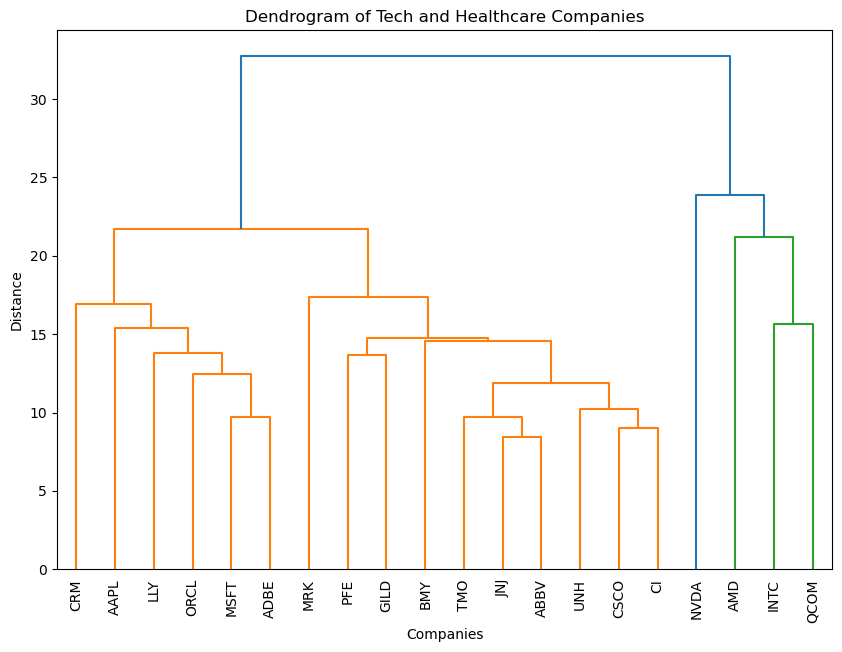

In [20]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 7))
dendrogram(selected_dissimilarity, labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Tech and Healthcare Companies')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.show()

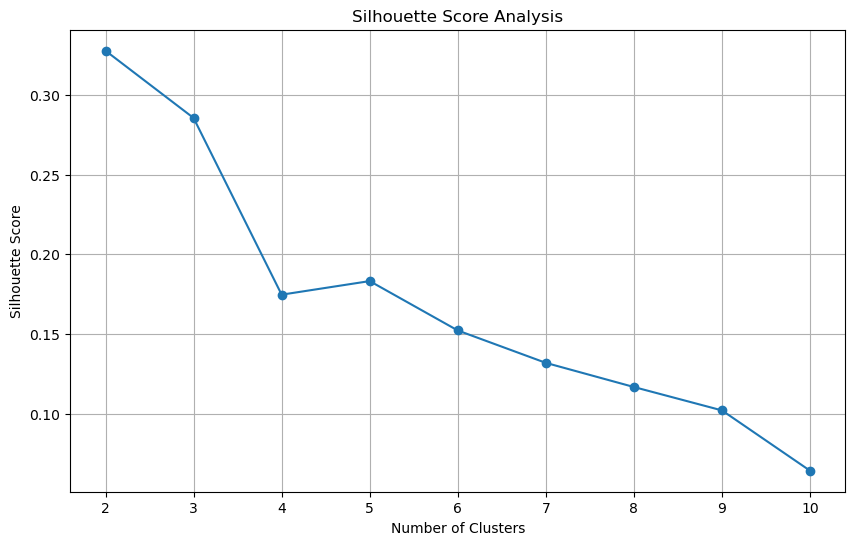

In [24]:
# For Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11) # range of clusters to test

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Apply Agglomerative Clustering with a specified number of clusters
    cluster_labels = fcluster(selected_dissimilarity, n_clusters, criterion='maxclust')
    
    # Calculate the silhouette score for each number of clusters
    score = silhouette_score(df[selected_companies].T, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [26]:
import numpy as np

# To find the optimal number of clusters 
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
optimal_n_clusters

2

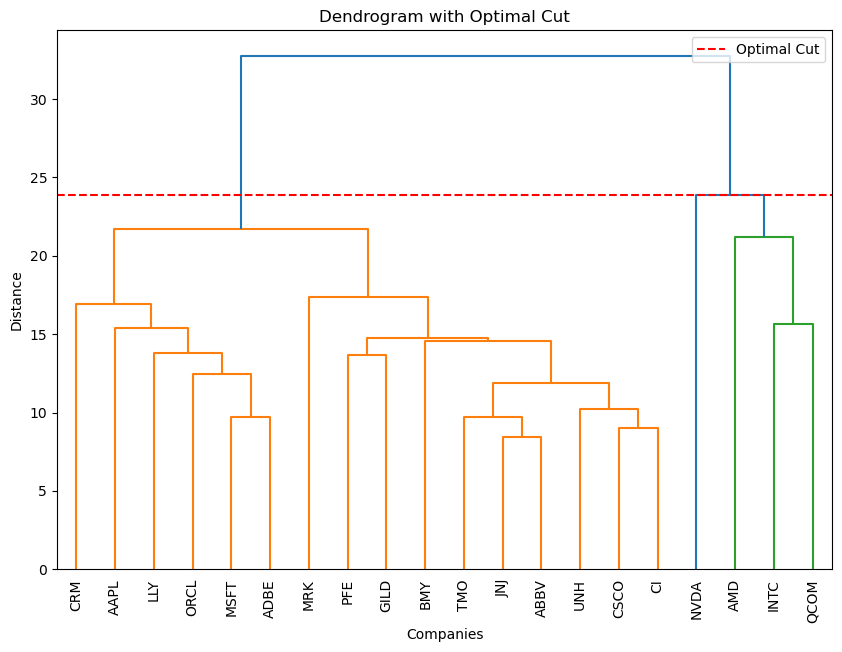

In [27]:
plt.figure(figsize=(10, 7))
dendrogram(selected_dissimilarity, labels=df[selected_companies].columns, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=selected_dissimilarity[-optimal_n_clusters, 2], color='r', linestyle='--', label='Optimal Cut')
plt.title('Dendrogram with Optimal Cut')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.legend()
plt.show()